In [25]:
# Starting Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing as pre

In [26]:
# Importing data into dataframe
import pandas as pd

prepay_df = pd.read_csv('SF_2021_MI_Prepay.csv')
prepay_df.head()

# PREPAY_VOLUNTARY - Response Variable - 0: Did not Prepay 1: Did Prepay
# LOAN_IDENTIFIER
# UNEMPL_RATE - National Unemployment Rate Percentage
# HPI - Important indicator for estimating prepayments, defaults, and housing affordability.
# RATE_30YR - 30 Year Intrest Rate
# YIELD - The 10-year is used as a proxy for mortgage rates.
# ORIGINAL_INTEREST_RATE - The original interest rate on a mortgage loan as identified in the original mortgage note.
# PREV_MONTH_LOAN_FACTOR - With Prev_Loan_Factor we can see the unpaid principal balance just before prepayment.
# ORIGINAL_UPB - unpaid principal balance
# 

,PREPAY_VOLUNTARY,LOAN_IDENTIFIER,UNEMPL_RATE,HPI,RATE_30YR,YIELD,ORIGINAL_INTEREST_RATE,PREV_MONTH_LOAN_FACTOR,ORIGINAL_UPB,DTI,ORIGINAL_LTV,BORROWER_CREDIT_SCORE_AT_ORIGINATION,NUMBER_OF_BORROWERS,CHANNEL,PROPERTY_TYPE,OCCUPANCY_STATUS,ALTERNATIVE_DELINQUENCY_RESOLUTION,PROPERTY_VALUATION_METHOD
0,0,548942972133,3.7,367.26,3.098,1.47,0.06125,0.839261,152000.0,0.33,0.69,675.0,1.0,Retail,Single-family home,Principal,Appraisal,NaN
1,0,551308347809,3.7,367.26,3.098,1.47,0.05990,0.905107,115000.0,0.42,0.70,728.0,1.0,Correspondent,Single-family home,Principal,Appraisal,NaN
2,1,548723741884,5.7,334.33,3.060,1.64,0.06500,0.536282,46000.0,0.14,0.80,791.0,2.0,Retail,Single-family home,Investor,Appraisal,NaN
3,0,207792231451,3.7,367.26,3.098,1.47,0.04750,0.849335,154000.0,0.30,0.89,771.0,2.0,Correspondent,Condominium,Principal,Appraisal,NaN
4,0,207835001506,3.7,367.26,3.098,1.47,0.04500,0.834630,167000.0,0.40,0.95,801.0,1.0,Correspondent,Planned Urban Development,Principal,Appraisal,NaN


In [ ]:
# Checking Normality (Not needed)
import scipy.stats as stats
import pylab

for i in range(prepay_df.shape[1]):  
    stats.probplot(prepay_df.iloc[:,i], dist="norm", plot=pylab)
    pylab.show()

In [27]:
# Droping column with too many NaN
prepay_df[prepay_df.isna().any(axis=1)]
prepay_df = prepay_df.drop(columns="PROPERTY_VALUATION_METHOD")

In [28]:
# Droping rows that have NaNs
len(prepay_df[prepay_df.isna().any(axis=1)])
prepay_df = prepay_df.dropna()
prepay_df = prepay_df.drop(columns="LOAN_IDENTIFIER")

In [29]:
# prepay_df = prepay_df.astype({"PREPAY_VOLUNTARY":'int', "ALTERNATIVE_DELINQUENCY_RESOLUTION": 'int', "OCCUPANCY_STATUS": 'int', "PROPERTY_TYPE": 'int', "CHANNEL": 'int'})

categories = prepay_df["ALTERNATIVE_DELINQUENCY_RESOLUTION"].unique()
prepay_df.replace(categories,range(0,len(categories)), inplace=True)

categories = prepay_df["OCCUPANCY_STATUS"].unique()
prepay_df.replace(categories,range(0,len(categories)), inplace=True)

categories = prepay_df["PROPERTY_TYPE"].unique()
prepay_df.replace(categories,range(0,len(categories)), inplace=True)

categories = prepay_df["CHANNEL"].unique()
prepay_df.replace(categories,range(0,len(categories)), inplace=True)

print(prepay_df.info())

prepay_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574874 entries, 0 to 576162
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   PREPAY_VOLUNTARY                      574874 non-null  int64  
 1   UNEMPL_RATE                           574874 non-null  float64
 2   HPI                                   574874 non-null  float64
 3   RATE_30YR                             574874 non-null  float64
 4   YIELD                                 574874 non-null  float64
 5   ORIGINAL_INTEREST_RATE                574874 non-null  float64
 6   PREV_MONTH_LOAN_FACTOR                574874 non-null  float64
 7   ORIGINAL_UPB                          574874 non-null  float64
 8   DTI                                   574874 non-null  float64
 9   ORIGINAL_LTV                          574874 non-null  float64
 10  BORROWER_CREDIT_SCORE_AT_ORIGINATION  574874 non-null  float64
 11  

,PREPAY_VOLUNTARY,UNEMPL_RATE,HPI,RATE_30YR,YIELD,ORIGINAL_INTEREST_RATE,PREV_MONTH_LOAN_FACTOR,ORIGINAL_UPB,DTI,ORIGINAL_LTV,BORROWER_CREDIT_SCORE_AT_ORIGINATION,NUMBER_OF_BORROWERS,CHANNEL,PROPERTY_TYPE,OCCUPANCY_STATUS,ALTERNATIVE_DELINQUENCY_RESOLUTION
0,0,3.7,367.26,3.098,1.47,0.06125,0.839261,152000.0,0.33,0.69,675.0,1.0,0,0,0,0
1,0,3.7,367.26,3.098,1.47,0.05990,0.905107,115000.0,0.42,0.70,728.0,1.0,1,0,0,0
2,1,5.7,334.33,3.060,1.64,0.06500,0.536282,46000.0,0.14,0.80,791.0,2.0,0,0,1,0
3,0,3.7,367.26,3.098,1.47,0.04750,0.849335,154000.0,0.30,0.89,771.0,2.0,1,1,0,0
4,0,3.7,367.26,3.098,1.47,0.04500,0.834630,167000.0,0.40,0.95,801.0,1.0,1,2,0,0


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split

prepay_train, prepay_test = train_test_split(prepay_df, test_size=0.2)
print(len(prepay_train))
print(len(prepay_test))

459899
114975


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# print(prepay_test["PREPAY_VOLUNTARY"])
# y = prepay_test["PREPAY_VOLUNTARY"]
# x = prepay_test.drop(columns="PREPAY_VOLUNTARY")
# prepay_test = scaler.fit_transform(x,y)
# print(len(prepay_test))
# prepay_train_y = scaler.fit_transform(prepay_train["PREPAY_VOLUNTARY"])
# prepay_train_x = scaler.fit_transform(prepay_train.drop(columns="LOAN_IDENTIFIER"))

114975


In [51]:
model = LogisticRegression()
y = prepay_train["PREPAY_VOLUNTARY"]
x = prepay_train.drop(columns="PREPAY_VOLUNTARY")
model = model.fit(x,y)
y = prepay_test["PREPAY_VOLUNTARY"]
x = prepay_test.drop(columns="PREPAY_VOLUNTARY")
model_pred = model.predict(x)

In [52]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, model_pred)
print(cnf_matrix)

[[94720     1]
 [15350  4904]]


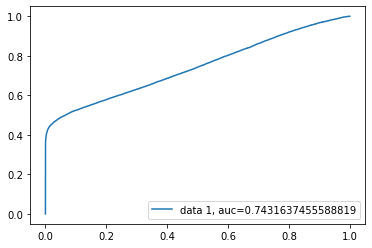

In [53]:
y_pred_proba = model.predict_proba(x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()